EraserのRPKMからlogfoldを計算

In [35]:
import pandas as pd
import numpy as np
import math

In [4]:
control=pd.read_csv("/Users/miyakesho/Box Sync/Personal/m6A/data/phase2/Eraser/GSM986109_HeLa.Conc.gene.txt",sep="\t")
control.head(10)

,GeneID,Symbol,Description,RefSeq,sample_2,value_2
0,100287102.0,DDX11L1,DEAD/H (Asp-Glu-Ala-Asp/His) box helicase 11 l...,NR_046018,siC,0.000000
1,NaN,NaN,NaN,hsa-mir-1302-2,siC,0.000000
2,79501.0,OR4F5,"olfactory receptor, family 4, subfamily F, mem...",NM_001005484,siC,0.000000
3,100132062.0,LOC100132062,uncharacterized LOC100132062,"NR_028325,NR_028327",siC,0.074402
4,81399.0,OR4F16,"olfactory receptor, family 4, subfamily F, mem...",NM_001005277,siC,0.000000
5,643837.0,LOC643837,uncharacterized LOC643837,"NR_015368,NR_047519,NR_047520,NR_047521,NR_047...",siC,2.100240
6,148398.0,SAMD11,sterile alpha motif domain containing 11,NM_152486,siC,26.510400
7,339451.0,KLHL17,kelch-like 17 (Drosophila),NM_198317,siC,18.287300
8,84069.0,PLEKHN1,"pleckstrin homology domain containing, family ...","NM_001160184,NM_032129",siC,1.552980
9,9636.0,ISG15,ISG15 ubiquitin-like modifier,NM_005101,siC,33.883200


In [6]:
knockdown=pd.read_csv("/Users/miyakesho/Box Sync/Personal/m6A/data/phase2/Eraser/GSM986110_HeLa.ALKBH5.gene.txt",sep="\t")
knockdown.head(10)

,GeneID,Symbol,Description,RefSeq,sample_1,value_1
0,100287102.0,DDX11L1,DEAD/H (Asp-Glu-Ala-Asp/His) box helicase 11 l...,NR_046018,siABH5,0.00000
1,NaN,NaN,NaN,hsa-mir-1302-2,siABH5,0.00000
2,79501.0,OR4F5,"olfactory receptor, family 4, subfamily F, mem...",NM_001005484,siABH5,0.00000
3,100132062.0,LOC100132062,uncharacterized LOC100132062,"NR_028325,NR_028327",siABH5,0.00000
4,81399.0,OR4F16,"olfactory receptor, family 4, subfamily F, mem...",NM_001005277,siABH5,0.00000
5,643837.0,LOC643837,uncharacterized LOC643837,"NR_015368,NR_047519,NR_047520,NR_047521,NR_047...",siABH5,1.13116
6,148398.0,SAMD11,sterile alpha motif domain containing 11,NM_152486,siABH5,22.19390
7,339451.0,KLHL17,kelch-like 17 (Drosophila),NM_198317,siABH5,25.21630
8,84069.0,PLEKHN1,"pleckstrin homology domain containing, family ...","NM_001160184,NM_032129",siABH5,1.25470
9,9636.0,ISG15,ISG15 ubiquitin-like modifier,NM_005101,siABH5,669.22700


In [86]:
merge=pd.merge(knockdown,control,on="RefSeq")
merge=merge.dropna()
merge=merge[~merge.duplicated()]
merge

,GeneID_x,Symbol_x,Description_x,RefSeq,sample_1,value_1,GeneID_y,Symbol_y,Description_y,sample_2,value_2
0,100287102.0,DDX11L1,DEAD/H (Asp-Glu-Ala-Asp/His) box helicase 11 l...,NR_046018,siABH5,0.000000,100287102.0,DDX11L1,DEAD/H (Asp-Glu-Ala-Asp/His) box helicase 11 l...,siC,0.000000
2,79501.0,OR4F5,"olfactory receptor, family 4, subfamily F, mem...",NM_001005484,siABH5,0.000000,79501.0,OR4F5,"olfactory receptor, family 4, subfamily F, mem...",siC,0.000000
3,100132062.0,LOC100132062,uncharacterized LOC100132062,"NR_028325,NR_028327",siABH5,0.000000,100132062.0,LOC100132062,uncharacterized LOC100132062,siC,0.074402
4,100132062.0,LOC100132062,uncharacterized LOC100132062,"NR_028325,NR_028327",siABH5,0.000000,100132062.0,LOC100132062,uncharacterized LOC100132062,siC,0.000000
7,81399.0,OR4F16,"olfactory receptor, family 4, subfamily F, mem...",NM_001005277,siABH5,0.000000,81399.0,OR4F16,"olfactory receptor, family 4, subfamily F, mem...",siC,0.000000
16,643837.0,LOC643837,uncharacterized LOC643837,"NR_015368,NR_047519,NR_047520,NR_047521,NR_047...",siABH5,1.131160,643837.0,LOC643837,uncharacterized LOC643837,siC,2.100240
17,148398.0,SAMD11,sterile alpha motif domain containing 11,NM_152486,siABH5,22.193900,148398.0,SAMD11,sterile alpha motif domain containing 11,siC,26.510400
18,339451.0,KLHL17,kelch-like 17 (Drosophila),NM_198317,siABH5,25.216300,339451.0,KLHL17,kelch-like 17 (Drosophila),siC,18.287300
19,84069.0,PLEKHN1,"pleckstrin homology domain containing, family ...","NM_001160184,NM_032129",siABH5,1.254700,84069.0,PLEKHN1,"pleckstrin homology domain containing, family ...",siC,1.552980
20,9636.0,ISG15,ISG15 ubiquitin-like modifier,NM_005101,siABH5,669.227000,9636.0,ISG15,ISG15 ubiquitin-like modifier,siC,33.883200


In [87]:
TE_list=[]
for i in range(0,len(merge)):
    a_col=[]
    col=merge.iloc[i]
    a_col.append(col.GeneID_x)
    a_col.append(col.Symbol_x)
    a_col.append(col.Description_x)
    a_col.append(col.RefSeq)
    a_col.append(math.log2(col.value_1+1))
    a_col.append(math.log2(col.value_2+1))
    logfold=math.log2((col.value_1+1)/(col.value_2+1))
    a_col.append(logfold)
    TE_list.append(a_col)


In [88]:
TE_list=pd.DataFrame(TE_list,columns=["GeneID","Symbol","Description","RefSeq","logKD","logCL","logfold"])
TE_list

,GeneID,Symbol,Description,RefSeq,logKD,logCL,logfold
0,100287102.0,DDX11L1,DEAD/H (Asp-Glu-Ala-Asp/His) box helicase 11 l...,NR_046018,0.000000,0.000000,0.000000
1,79501.0,OR4F5,"olfactory receptor, family 4, subfamily F, mem...",NM_001005484,0.000000,0.000000,0.000000
2,100132062.0,LOC100132062,uncharacterized LOC100132062,"NR_028325,NR_028327",0.000000,0.103534,-0.103534
3,100132062.0,LOC100132062,uncharacterized LOC100132062,"NR_028325,NR_028327",0.000000,0.000000,0.000000
4,81399.0,OR4F16,"olfactory receptor, family 4, subfamily F, mem...",NM_001005277,0.000000,0.000000,0.000000
5,643837.0,LOC643837,uncharacterized LOC643837,"NR_015368,NR_047519,NR_047520,NR_047521,NR_047...",1.091639,1.632380,-0.540741
6,148398.0,SAMD11,sterile alpha motif domain containing 11,NM_152486,4.535674,4.781905,-0.246232
7,339451.0,KLHL17,kelch-like 17 (Drosophila),NM_198317,4.712392,4.269579,0.442813
8,84069.0,PLEKHN1,"pleckstrin homology domain containing, family ...","NM_001160184,NM_032129",1.172935,1.352182,-0.179247
9,9636.0,ISG15,ISG15 ubiquitin-like modifier,NM_005101,9.388506,5.124460,4.264046


In [78]:
TE_list=TE_list[TE_list["logfold"] != 0]

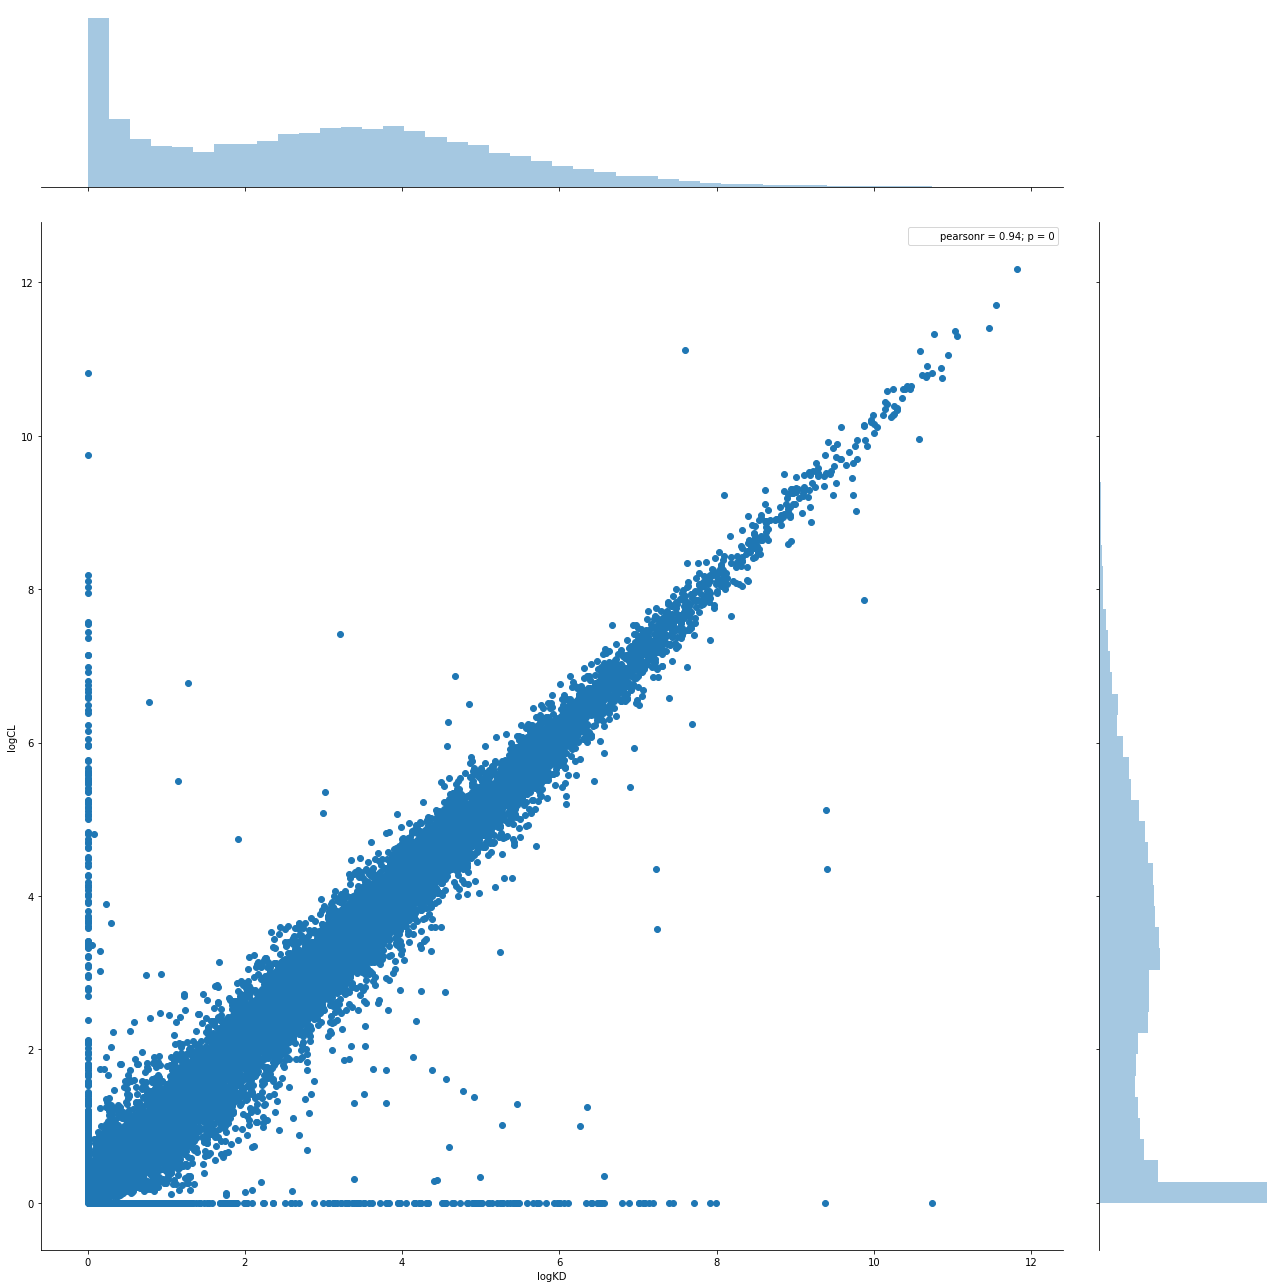

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.jointplot(TE_list.logKD, TE_list.logCL,size=18)
plt.show()

In [85]:
increase=TE_list[TE_list.logfold>0]
increase

,GeneID,Symbol,Description,RefSeq,logKD,logCL,logfold
7,339451.0,KLHL17,kelch-like 17 (Drosophila),NM_198317,4.712392,4.269579,0.442813
9,9636.0,ISG15,ISG15 ubiquitin-like modifier,NM_005101,9.388506,5.124460,4.264046
10,375790.0,AGRN,agrin,NM_198576,6.936108,6.737687,0.198421
19,80772.0,GLTPD1,glycolipid transfer protein domain containing 1,NM_001029885,3.783708,3.616275,0.167433
20,83756.0,TAS1R3,"taste receptor, type 1, member 3",NM_152228,1.326140,1.010909,0.315232
25,83858.0,ATAD3B,"ATPase family, AAA domain containing 3B",NM_031921,5.580161,5.552297,0.027863
27,142678.0,MIB2,mindbomb E3 ubiquitin protein ligase 2,"NM_001170686,NM_001170687,NM_001170688,NM_0011...",3.425419,3.379633,0.045786
28,8510.0,MMP23B,matrix metallopeptidase 23B,NM_006983,0.352989,0.000000,0.352989
31,2563.0,GABRD,"gamma-aminobutyric acid (GABA) A receptor, delta",NM_000815,0.848730,0.000000,0.848730
36,8764.0,TNFRSF14,"tumor necrosis factor receptor superfamily, me...",NM_003820,0.541296,0.408714,0.132582


In [89]:
TE_list.to_csv("Eraser_logfold.csv",index=False)

In [91]:
RPKM_list=[]
for i in range(0,len(TE_list)):
    col=TE_list.iloc[i]
    gene=col.GeneID
    symbol=col.Symbol
    description=col.Description
    Refseq=col.RefSeq
    refseq=Refseq.split(",")
    KD=col.logKD
    CL=col.logCL
    logfold=col.logfold
    for ID in refseq:
        a_col=[]
        a_col.append(ID)
        a_col.append(gene)
        a_col.append(symbol)
        a_col.append(description)
        a_col.append(KD)
        a_col.append(CL)
        a_col.append(logfold)
        RPKM_list.append(a_col)
        

In [93]:
RPKM_list=pd.DataFrame(RPKM_list,columns=["GeneID","Symbol","Description","RefSeq","logKD","logCL","logfold"])
RPKM_list.to_csv("Eraser_ID_logfold.csv",index=False)
RPKM_list

,GeneID,Symbol,Description,RefSeq,logKD,logCL,logfold
0,NR_046018,100287102.0,DDX11L1,DEAD/H (Asp-Glu-Ala-Asp/His) box helicase 11 l...,0.000000,0.000000,0.000000
1,NM_001005484,79501.0,OR4F5,"olfactory receptor, family 4, subfamily F, mem...",0.000000,0.000000,0.000000
2,NR_028325,100132062.0,LOC100132062,uncharacterized LOC100132062,0.000000,0.103534,-0.103534
3,NR_028327,100132062.0,LOC100132062,uncharacterized LOC100132062,0.000000,0.103534,-0.103534
4,NR_028325,100132062.0,LOC100132062,uncharacterized LOC100132062,0.000000,0.000000,0.000000
5,NR_028327,100132062.0,LOC100132062,uncharacterized LOC100132062,0.000000,0.000000,0.000000
6,NM_001005277,81399.0,OR4F16,"olfactory receptor, family 4, subfamily F, mem...",0.000000,0.000000,0.000000
7,NR_015368,643837.0,LOC643837,uncharacterized LOC643837,1.091639,1.632380,-0.540741
8,NR_047519,643837.0,LOC643837,uncharacterized LOC643837,1.091639,1.632380,-0.540741
9,NR_047520,643837.0,LOC643837,uncharacterized LOC643837,1.091639,1.632380,-0.540741
